<a href="https://colab.research.google.com/github/realover82/AINFT-Lab/blob/master/220725%EC%8B%A4%EC%A0%9C%EA%B0%90%EC%9E%90_ver11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd

/root


In [ ]:
cd ..

/


In [ ]:
cd content/drive/MyDrive/deeplearning

/content/drive/MyDrive/deeplearning


머신러닝 모델 로딩

In [ ]:
import numpy as np  
import datetime
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras import Model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 32
COLOR_MODE = 'rgb'
TARGET_SIZE = (255, 255)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL

def my_model():
  vgg19_model = VGG19(weights='imagenet',include_top=False,input_shape=INPUT_SIZE)
  vgg19_model.trainable = False
  flatten =Flatten()(vgg19_model.layers[-1].output)
  fc1 = Dense(units=4096, activation ='relu')(flatten)
  dropout = Dropout(0.2)(fc1)
  fc2 = Dense(units=1024,activation='relu')(dropout)
  output = Dense(2, activation='softmax')(fc2)
  model = Model(inputs = vgg19_model.input, outputs=output)
  model.summary()
  return model

In [ ]:
model.compile(loss='mse', optimizer='SGD')

In [ ]:
model = my_model()

80150528/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                              

모델 저장한것 불러오기

In [ ]:
model = tf.keras.models.load_model('my_model-p4-8.h5')

불량감자 classes 분류 설정

In [ ]:
# -- Data Normalization --
data_generator = ImageDataGenerator(samplewise_center=True, #making sure that each image has a mean of 0
                                    samplewise_std_normalization=True, #and standard deviation 1
                                    horizontal_flip=True, #Randomly flip inputs horizontally
                                    validation_split=0.3,
                                    )

In [ ]:
# -- Global Variables -- 
TRAIN_PATH = 'potato/train'
# TEST_PATH = 'Pepsico RnD Potato Lab Dataset/Test'
TEST_PATH = 'potato/test'
BATCH_SIZE = 32
COLOR_MODE = 'rgb'
TARGET_SIZE = (255, 255)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL
EPOCHS = 2
CLASSES = ['Defective','Non-Defective']

In [ ]:
# -- Data iterators -- 
train_data = data_generator.flow_from_directory(directory=TRAIN_PATH,
                                                target_size=TARGET_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                color_mode=COLOR_MODE,
                                                subset='training',
                                                shuffle=True)         
    
validation_data = data_generator.flow_from_directory(directory=TRAIN_PATH,
                                                     target_size=TARGET_SIZE,
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical',
                                                     color_mode=COLOR_MODE,
                                                     subset='validation',
                                                     shuffle=True)             

test_data = data_generator.flow_from_directory(directory=TEST_PATH,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               color_mode=COLOR_MODE,
                                               shuffle=True)

Found 15 images belonging to 2 classes.
Found 5 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [ ]:
model.compile(loss='mse', optimizer='SGD')

In [ ]:
# -- Train model --
history = model.fit(x=train_data, 
                        epochs=EPOCHS, 
                        steps_per_epoch=len(train_data), 
                        verbose=1
                        # validation_data=validation_data, 
                        # validation_steps=1)
)

Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 0.2652
Epoch 2/2
1/1 [==============================] - 14s 14s/step - loss: 0.2650


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

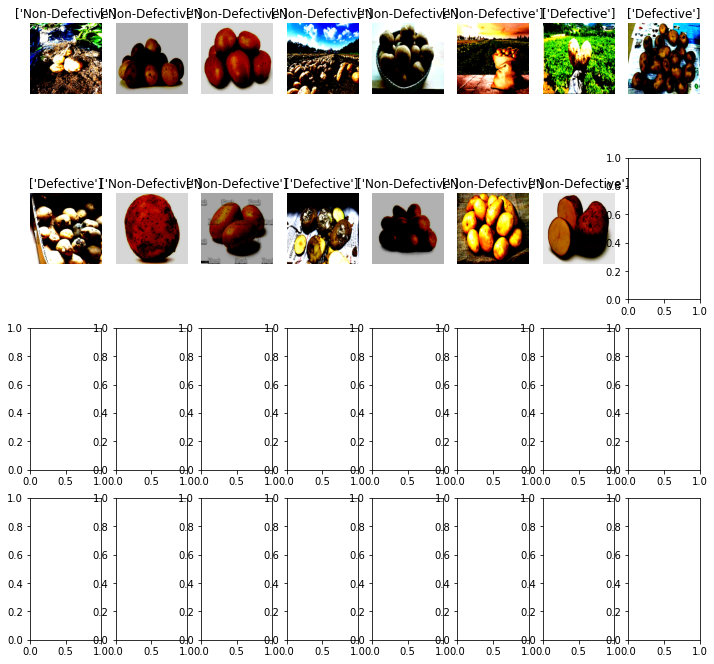

In [ ]:
# -- plot random batch -- 
images, labels = train_data.next()
classes = np.asarray(CLASSES)

_, axs = plt.subplots(4, 8, figsize=(12,12))
axs = axs.flatten()
for img, label, ax in zip(images, labels, axs):
    ax.imshow(img)
    ax.axis('off')
    label = label.astype(int)
    ax.set_title(classes[label == 1])
plt.show()

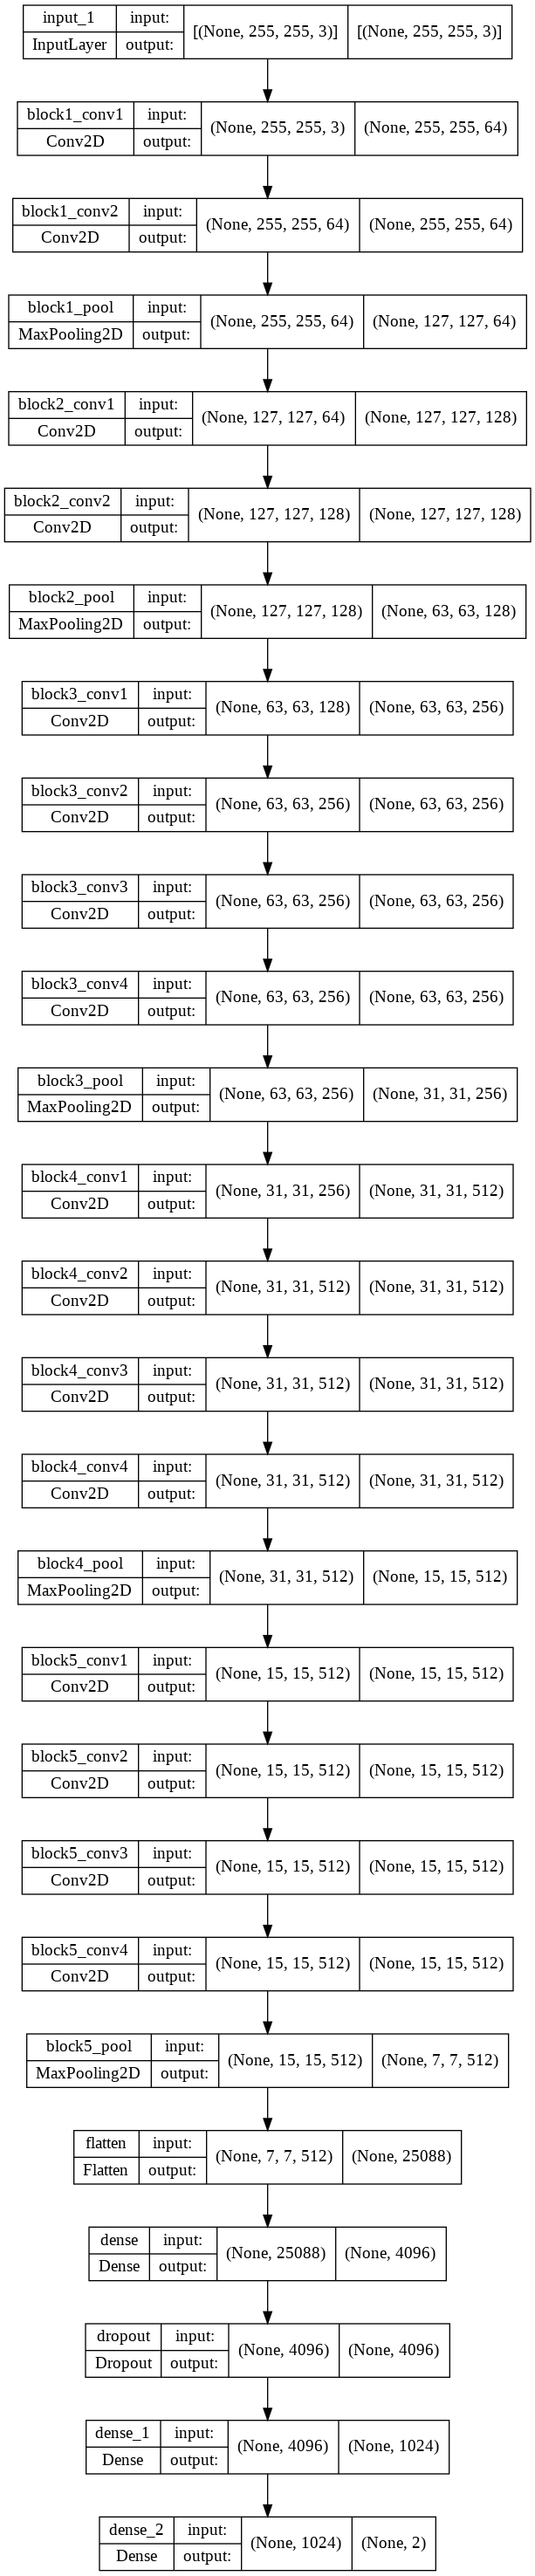

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='T', expand_nested=False, dpi=96
)

In [ ]:
model = my_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0   

불량감자 테스트

In [ ]:

img = tf.keras.preprocessing.image.load_img("potato/test/non-defective/0016.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
# print(CLASSES)
# print(classes)
print(classes[output[0]!=0])


[[2.1076621e-06 9.9999785e-01]]
['Defective' 'Non-Defective']


In [ ]:

img = tf.keras.preprocessing.image.load_img("potato/test/defective/f-006.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
# print(CLASSES)
# print(classes)
print(classes[output[0]!=0])


[[2.1216922e-06 9.9999785e-01]]
['Defective' 'Non-Defective']


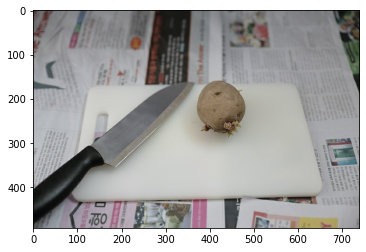

In [ ]:
img = tf.io.read_file("potato/test/defective/f-006.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Test/Not Defective

In [ ]:
# -- Train model --
history = model.fit(x=train_data, 
                        epochs=100, 
                        steps_per_epoch=len(train_data), 
                        verbose=1
                        # validation_data=validation_data, 
                        # validation_steps=1)
)

Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 0.2647
Epoch 2/100
1/1 [==============================] - 12s 12s/step - loss: 0.2639
Epoch 3/100
1/1 [==============================] - 12s 12s/step - loss: 0.2651
Epoch 4/100
1/1 [==============================] - 14s 14s/step - loss: 0.2634
Epoch 5/100
1/1 [==============================] - 12s 12s/step - loss: 0.2617
Epoch 6/100
1/1 [==============================] - 12s 12s/step - loss: 0.2629
Epoch 7/100
1/1 [==============================] - 12s 12s/step - loss: 0.2572
Epoch 8/100
1/1 [==============================] - 12s 12s/step - loss: 0.2531
Epoch 9/100
1/1 [==============================] - 15s 15s/step - loss: 0.2242
Epoch 10/100
1/1 [==============================] - 12s 12s/step - loss: 0.0787
Epoch 11/100
1/1 [==============================] - 12s 12s/step - loss: 0.1140
Epoch 12/100
1/1 [==============================] - 12s 12s/step - loss: 0.2650
Epoch 13/100
1/1 [==============================]

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(loss='mse', optimizer='SGD')

In [ ]:
# -- Train model --
history = model.fit(x=train_data, 
                        epochs=2, 
                        steps_per_epoch=len(train_data), 
                        verbose=1
                        # validation_data=validation_data, 
                        # validation_steps=1)
)

Epoch 1/2


InvalidArgumentError: ignored

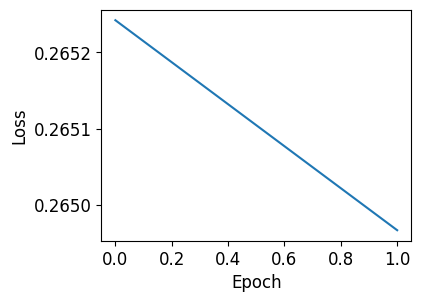

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

머신러닝 학습

In [ ]:
# -- Save model -- 
model.save('my_model-potato-1.h5')

In [ ]:
def learning_curves(history):
    '''plot learning curves'''
    
    acc = history.history['acc']
    # val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    # val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    # plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('acc')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    # plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss - Cross Entropy')
    plt.xlabel('epoch')
    plt.ylim([0,1.6])
    plt.title('Training and Validation Loss')
    
    plt.show()

In [ ]:
def learning_curves(history):
    '''plot learning curves'''
    
    acc = history.history['accuracy']
    # val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    # val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    # plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    # plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss - Cross Entropy')
    plt.xlabel('epoch')
    plt.ylim([0,1.6])
    plt.title('Training and Validation Loss')
    
    plt.show()

In [ ]:
# -- Plot learning curves -- 
learning_curves(history)

KeyError: ignored